# Preliminary operations

## Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Mount Google Drive

In [2]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data import

In [3]:
# import dataset
df = pd.read_csv("drive/MyDrive/Progetto Data Mining 1/Dataset/ravdess_features.csv")
df_prep = df.copy()
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

#Data Preparation: cleaning

In this part, the main data preparation operations are performed:


1.   Removal of useless attributes in the datasets 
2.   Filling of the missing values (by the median)
3.   Checking and removal of duplicate data records
4.   Splitting of the dataset by the emotional emphasis


##Removal of useless attributes

In [4]:
# find and remove colums with a unique value
nunique = df_prep.nunique()
cols_to_drop = nunique[nunique == 1].index
df_prep.drop(cols_to_drop, axis=1, inplace=True)

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            1636 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Filling of missing values

In [5]:
# iterating the categorical data columns with missing values ("vocal_channel" and "actor")
for col in ["vocal_channel", "actor"]:
  # grouping the rows by emotions
  df_prep[col] = df_prep.groupby(["emotional_intensity", "statement", "repetition", "sex"])[col].apply(
      # using the "fillna" function for filling the NaN values in each single group "x"
      lambda x: x.fillna(
          # filling the NaN values in group "x" using a sample, where the NaN values has been replaced with random values (".sample" function)
          # these random values has been extracted from a series equal to "x", but where the rows with NaN values has been deleted (".dropna" function)"
          x.dropna().sample(
              n = len(x),
              replace=True
          # the sample must has the same index of "x" for being overwrited on it
              ).set_axis(
                  x.index
                  )
          )
      )
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            1636 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

In [6]:
# switching to the only non-categorical column with missing values (intensity)
col = "intensity"

# filling missing values of each group (by emotion) with the group median
df_prep[col] = df_prep[col].fillna(
    value=df_prep.groupby(["vocal_channel", "emotional_intensity", "statement", "repetition", "sex"])[col].transform(
        "median"
        )
    )
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Removal of duplicates

In [7]:
# dropping duplicates from the dataset
df_prep.drop_duplicates(inplace=True)

##Dataset splitting

In [8]:
# get the median of "intensity" for each emotion
df_prep["loudness"] = df_prep.groupby("emotion")["intensity"].transform("median")
# categorize records as "louder" or "non louder", basing on the median of intensity for each emotion
df_prep["loudness"] = df_prep.apply(lambda x: "high" if x["intensity"] > x["loudness"] else "low", axis=1)

# categorize emotions by type: strong or weak
df_prep["emotion_type"] = df_prep.apply(lambda x: "strong" if x["emotion"] in ("fearful","angry","happy","surprised", "disgust") else "weak", axis=1)

# define two groups of emphasis level

# high emphasis
df_emph_high = df_prep[
    # strong emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "weak"))
]

# low emphasis
df_emph_low = df_prep[
    # strong emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "weak"))
]

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

###Exporting

In [9]:
df_prep.to_excel("df_prep.xlsx",
             sheet_name='Prepared Data Set') 

In [10]:
df_emph_high.to_excel("df_prep_emph_high.xlsx",
             sheet_name='Prepared Data Set with low emphasis')

/usr/local/lib/python3.8/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [11]:
df_emph_low.to_excel("df_prep_emph_low.xlsx",
             sheet_name='Prepared Data Set with high emphasis') 

# Data Preparation: optimization


##Correlations

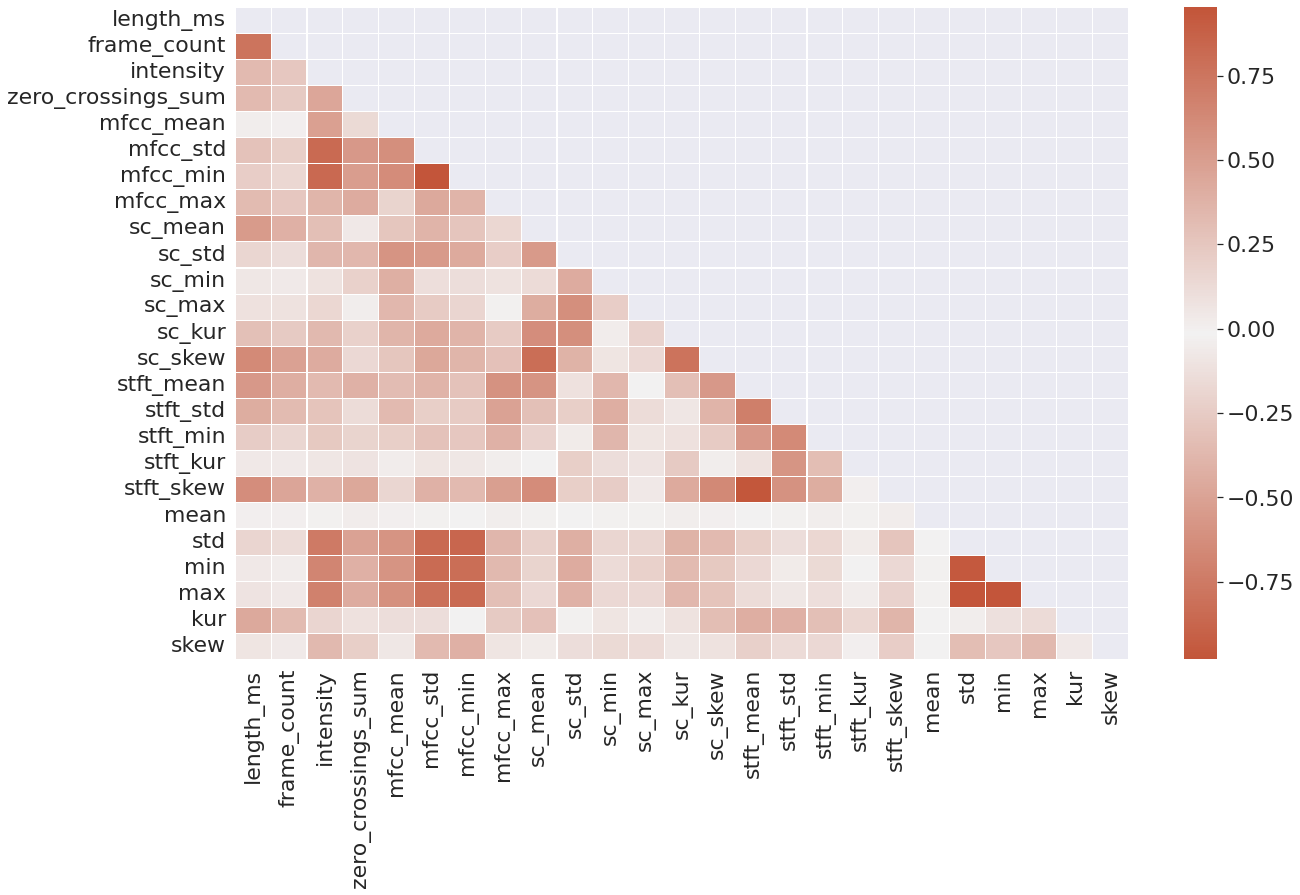

In [79]:
corr = df_data = df_prep.loc[:, "length_ms":"skew"].corr()
fig, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(20,20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, linewidths=.1) #Remove last element (not correlated)
plt.savefig("corr_matrix.svg", format="svg")
plt.show()

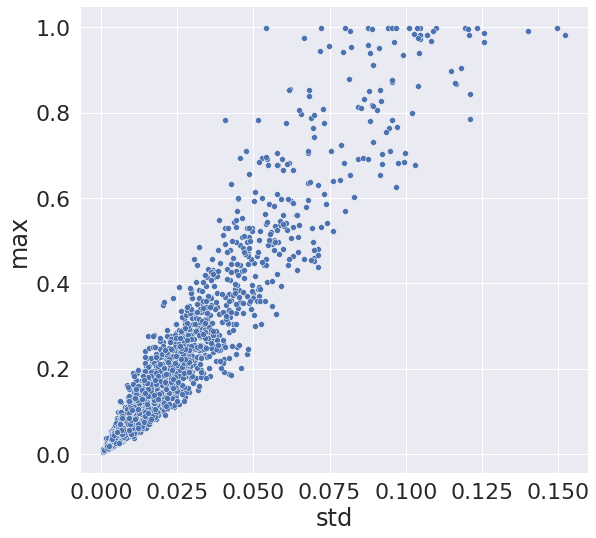

In [78]:
sns.relplot(data=df_prep, x="std", y="max", aspect=1.1, height=8)
plt.savefig("corr_std_max.svg", format="svg")
plt.show()

In [ ]:
# get correlations matrix
cor_matrix = df_prep.corr().abs()
# cut the correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# get attributes with a correaltion coeff higher then |0.75|
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

#drop high correlated attributes
df_prep.drop(df_prep[to_drop].columns, axis=1, inplace=True)

df_prep.info()

['frame_width', 'frame_count', 'mfcc_std', 'mfcc_min', 'sc_skew', 'stft_skew', 'std', 'min', 'max']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   int64  
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   int64  
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   f

<ipython-input-31-95c19d7c9edb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


##Handling of outliers

In [ ]:
# get only numerical data attributes
df_data = df_prep.loc[:, "length_ms":"skew"]

# define percentiles for removal of outliers
percentile25 = df_data.apply(lambda x: x.quantile(0.25))
percentile75 = df_data.apply(lambda x: x.quantile(0.75))
# define interquartile range (iqr)
iqr = percentile75 - percentile25

# define limits for the percentiles
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# get outliers
df_data_outliers = df_data[(df_data < upper_limit) & (df_data > lower_limit)]
df_prep.loc[:, "length_ms":"skew"] = df_data_outliers

# replace outliers with the group median
for col in df_data.columns:
    df_prep[col] = df_prep[col].fillna(
        value=df_prep.groupby(["vocal_channel", "emotional_intensity", "statement", "repetition", "sex"])[col].transform(
            "median"
            )
        )

##Dataset splitting

In [ ]:
# define two groups of emphasis level

# high emphasis
df_emph_high = df_prep[
    # strong emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "weak"))
]

# low emphasis
df_emph_low = df_prep[
    # strong emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "weak"))
]

###Export files

In [ ]:
df_prep.to_excel("df_opt.xlsx",
             sheet_name='Prepared Data Set') 

In [ ]:
df_emph_high.to_excel("df_opt_emph_high.xlsx",
             sheet_name='Prepared Data Set with low emphasis')

In [ ]:
df_emph_low.to_excel("df_opt_emph_low.xlsx",
             sheet_name='Prepared Data Set with high emphasis') 